![SNAR](https://pbs.twimg.com/media/FiJ8g6GX0AAt7s5?format=jpg&name=medium)

#### In this projects: 
    1. BA network - case study  
    2. Random connection 
    3. Network with fixed size  
    4. Simulations result for 2 and 3  
    
![SNAR](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Libraries </font>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import powerlaw as po
from scipy.io import mmread
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise 1 </font>
Implement BA algorithm.

In [2]:
m_0=3
m=2
n=10

In [3]:
def BA(m_0,m,n):
    G=nx.complete_graph(m_0)
    for i in range(n):
        G.add_node(i+m_0)
        d=[G.degree[i] for i in range(len(G.degree))]
        to_add=np.random.choice(len(d), m, p=d/np.sum(d),replace=False)
        for j in to_add:
            G.add_edge(i+m_0, j)
    return G

In [4]:
G=BA(m_0,m,n)

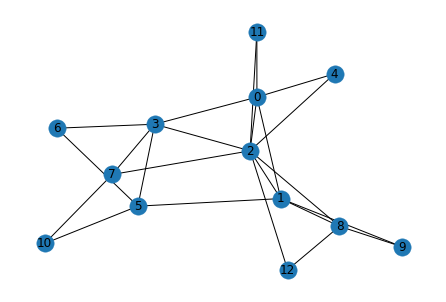

In [5]:
nx.draw(G, with_labels = True)

## <font color = #41EA46> Excercise 2 </font>
Use it to create an animation of a growing graph.

MovieWriter imagemagick unavailable; using Pillow instead.


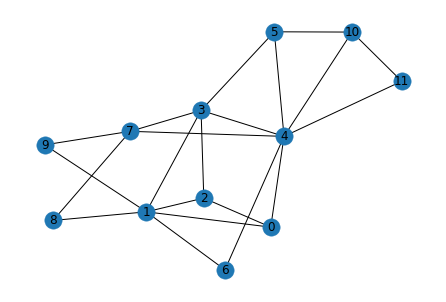

In [6]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

m_0=3
m=2
n=10
G=BA(m_0,m,n)
positions_G = nx.spring_layout(G,seed=123)

for i in range(n):
    nx.draw(nx.subgraph(G, np.arange(0,m_0+i)),pos=positions_G, with_labels = True)
    camera.snap()
    
    
animation = camera.animate()
animation.save('BA.gif', writer = 'imagemagick')

## <font color = #41EA46> Excercise 3 </font>
Plot the (averaged) histogram of the degree distribution at timet

In [7]:
m_0=3
m=2
n=100

In [8]:
deg_t=np.zeros((100,2*n))

In [9]:
for i in range(100):
    G=BA(m_0,m,n)
    deg=nx.degree_histogram(G)
    deg_t[i,:len(deg)]=deg

In [10]:
deg_avg=np.mean(deg_t,axis=0)

deg_avg2=deg_avg[:deg_avg[2:].argmin()+2]

<AxesSubplot:>

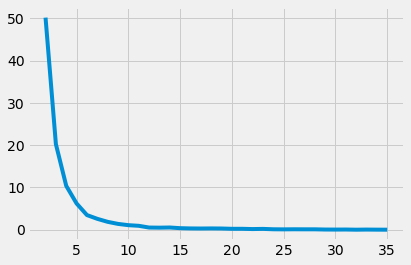

In [11]:
sns.lineplot(x=np.arange(2,len(deg_avg2)),y=deg_avg2[2:])

<AxesSubplot:>

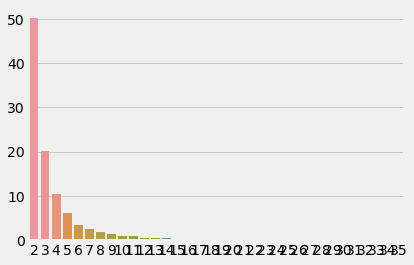

In [12]:
sns.barplot(x=np.arange(2,len(deg_avg2)),y=deg_avg2[2:])

## <font color = #41EA46> Excercise 4 </font>
Find the a(alpha) coefficient for the data from the previous tasks. Does itagree with our theoretical result from the lecture?

In [13]:
d=np.concatenate([np.array([i+2]*np.round(10*deg_avg2[2:][i]).astype("int"),dtype="int") for i in range(len(deg_avg2[2:]))])

In [14]:
fit=po.Fit(d)

fit.alpha

Calculating best minimal value for power law fit


3.164315363400647

γ = 3

## <font color = #41EA46> Excercise 5 </font>
Check with simulations relationki(t). Compare the predictions of theobtained formulas with the ”empirical” data from simpulations.

<AxesSubplot:>

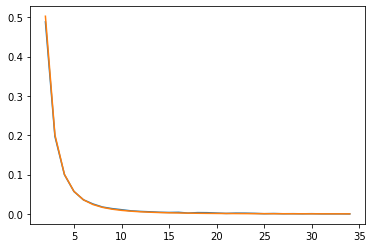

In [481]:
p_k=np.array([2*m*(m+1)/k/(k+1)/(k+2) for k in range(2,len(deg_avg2))])

p_k2=p_k/np.sum(p_k)

dev_avg3=deg_avg2[2:]/np.sum(deg_avg2[2:])

sns.lineplot(x=np.arange(2,len(deg_avg2)),y=dev_avg3)
sns.lineplot(x=np.arange(2,len(deg_avg2)),y=p_k2)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P6.1
Fill the gaps in the following derivation.

![P6.1](https://pbs.twimg.com/media/FirJRioXEAA-yQ8?format=jpg&name=small)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P6.2
Fill the gaps in the following derivation.

![P6.2](https://pbs.twimg.com/media/FirKyXtX0AAd_WP?format=jpg&name=small)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P6.3
Check with simulations result obtained for model A.

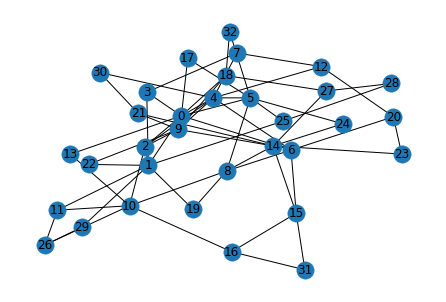

In [15]:
m_0=3
m=2
n=30

def model_A(m_0,m,n):
    G=nx.complete_graph(m_0)
    for i in range(n):
        G.add_node(i+m_0)
        d=[G.degree[i] for i in range(len(G.degree))]
        p=np.ones(len(d))
        p[-1]=0
        p=p/np.sum(p)
        to_add=np.random.choice(len(d), m, p=p,replace=False)
        for j in to_add:
            G.add_edge(i+m_0, j)
    return G

G=model_A(m_0,m,n)

nx.draw(G, with_labels = True)

In [16]:
m_0=3
m=2
n=100

In [17]:
deg_t=np.zeros((100,2*n))

In [18]:
for i in range(100):
    G=model_A(m_0,m,n)
    deg=nx.degree_histogram(G)
    deg_t[i,:len(deg)]=deg

In [19]:
deg_avg=np.mean(deg_t,axis=0)

deg_avg2=deg_avg[:deg_avg[2:].argmin()+2]

<AxesSubplot:>

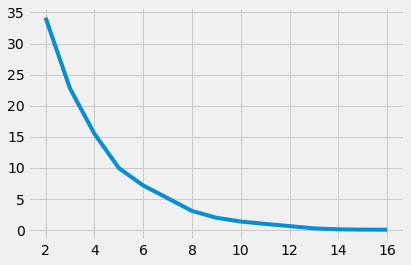

In [20]:
sns.lineplot(x=np.arange(2,len(deg_avg2)),y=deg_avg2[2:])

In [21]:
d=np.concatenate([np.array([i+2]*np.round(10*deg_avg2[2:][i]).astype("int"),dtype="int") for i in range(len(deg_avg2[2:]))])

In [22]:
fit=po.Fit(d)

fit.alpha

Calculating best minimal value for power law fit


6.651448499879694

In [23]:
np.e

2.718281828459045

<AxesSubplot:>

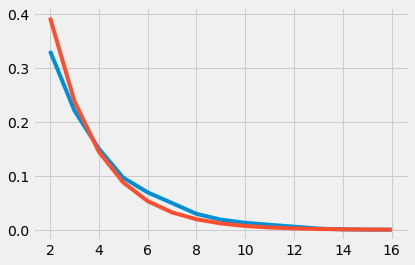

In [24]:
p_k=np.array([np.e/m*np.exp(-k/m) for k in range(2,len(deg_avg2))])

p_k2=p_k/np.sum(p_k)

dev_avg3=deg_avg2[2:]/np.sum(deg_avg2[2:])

sns.lineplot(x=np.arange(2,len(deg_avg2)),y=dev_avg3)
sns.lineplot(x=np.arange(2,len(deg_avg2)),y=p_k2)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P6.4
Check with simulations result obtained for model B.

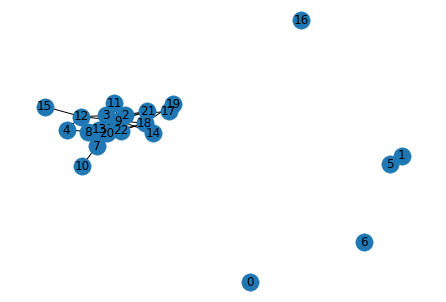

In [25]:
m_0=3
m=2
n=20

def model_B(m_0,n):
    G=nx.empty_graph(m_0)
    for i in range(n):
        d=[1+G.degree[i] for i in range(len(G.degree))]
        to_add=np.random.choice(len(d), m, p=d/np.sum(d),replace=False)
        G.add_edge(to_add[0], to_add[1])
    return G

G=model_B(m_0+n,m*n)

nx.draw(G, with_labels = True)

In [26]:
m_0=3
m=2
n=50

In [27]:
deg_t=np.zeros((100,m_0+n,m*n))

In [28]:
for i in range(100):
    G=nx.empty_graph(m_0+n)
    for j in range(n*m):
        d=[1+G.degree[i] for i in range(len(G.degree))]
        to_add=np.random.choice(len(d), m, p=d/np.sum(d),replace=False)
        G.add_edge(to_add[0], to_add[1])
        deg=[G.degree[i] for i in range(len(G.degree))]
        deg_t[i,:len(deg),j]=deg

In [29]:
deg_avg=np.mean(deg_t,axis=0)

In [30]:
k_i=np.array([2/(m_0+n)*t for t in range(m*n)])

<AxesSubplot:>

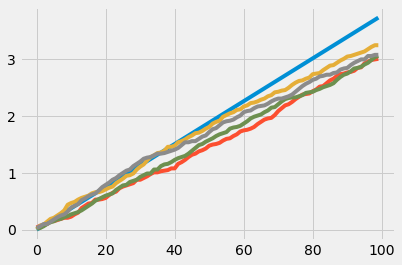

In [31]:
sns.lineplot(x=np.arange(0,100),y=k_i)
sns.lineplot(x=np.arange(0,100),y=deg_avg[0])
sns.lineplot(x=np.arange(0,100),y=deg_avg[1])
sns.lineplot(x=np.arange(0,100),y=deg_avg[2])
sns.lineplot(x=np.arange(0,100),y=deg_avg[3])

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P6.5
How to dervie distribution in Model B?

![SNAR](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)